In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.datasets import load_iris
from xgboost import XGBClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [68]:
import pandas as pd
Final_Dataset_Provider_Train = pd.read_csv('/content/Final_Dataset_Provider_Train.csv')
Final_Dataset_Provider_Test = pd.read_csv('/content/Final_Dataset_Provider_Test.csv')

In [69]:
Final_Dataset_Provider_Train.shape

(5410, 240)

In [70]:
Final_Dataset_Provider_Train['PotentialFraud'].replace(to_replace=['Yes','No'], value=[1,0], inplace=True)


In [71]:
Final_Dataset_Provider_Train.head(5)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,0.0,30.0,61,50225,125,50225,...,1872.124752,34.488500,79.928594,128.360407,16.0,9.0,21.0,4.0,0.0,0.0
1,PRV51003,1,605670,66286.0,0.0,382.0,617,265187,804,265188,...,9752.142258,248.575108,465.823969,662.905082,78.0,54.0,107.0,24.0,0.0,1.0
2,PRV51004,0,52170,310.0,0.0,0.0,362,299341,926,299341,...,10975.369856,45.457451,392.930581,690.434231,103.0,46.0,120.0,24.0,5.0,0.0
3,PRV51005,1,280910,3700.0,0.0,0.0,2433,2340483,7376,2340485,...,85836.366022,189.910839,2914.730682,5369.285209,654.0,511.0,893.0,262.0,10.0,0.0
4,PRV51007,0,33710,3264.0,0.0,19.0,141,144648,448,144648,...,5304.497707,35.451045,201.410628,337.941920,38.0,34.0,58.0,14.0,0.0,0.0


In [72]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the 'provider' column
Final_Dataset_Provider_Train['provider_encoded'] = le.fit_transform(Final_Dataset_Provider_Train['Provider'])

# insert the 'provider_encoded' column at the beginning of the DataFrame
Final_Dataset_Provider_Train.insert(0, 'provider_encoded', Final_Dataset_Provider_Train.pop('provider_encoded'))
Final_Dataset_Provider_Train = Final_Dataset_Provider_Train.drop(['Provider'], axis=1)

# now will do for final test as well 
# fit and transform the 'provider' column
Final_Dataset_Provider_Test['provider_encoded'] = le.fit_transform(Final_Dataset_Provider_Test['Provider'])

# insert the 'provider_encoded' column at the beginning of the DataFrame
Final_Dataset_Provider_Test.insert(0, 'provider_encoded', Final_Dataset_Provider_Test.pop('provider_encoded'))
Final_Dataset_Provider_Test = Final_Dataset_Provider_Test.drop(['Provider'], axis=1)

In [55]:
Final_Dataset_Provider_Train.head(2)

,provider_encoded,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
0,0,0,104640,5340.0,0.0,30.0,61,50225,125,50225,...,1872.124752,34.488500,79.928594,128.360407,16.0,9.0,21.0,4.0,0.0,0.0
1,1,1,605670,66286.0,0.0,382.0,617,265187,804,265188,...,9752.142258,248.575108,465.823969,662.905082,78.0,54.0,107.0,24.0,0.0,1.0


In [56]:
Final_Dataset_Provider_Test.head(2)

,provider_encoded,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
0,0,53790,380.0,0.0,0.0,406,411845,1323,411845,1331,...,15092.507241,52.992085,523.937738,948.937633,134.0,71.0,169.0,30.0,2.0,4.0
1,1,30720,0.0,0.0,0.0,315,204918,667,204918,675,...,7503.404945,15.885134,256.882846,471.402603,59.0,43.0,76.0,26.0,0.0,0.0


In [57]:
# Seperate dependent and independent variables
x_train = Final_Dataset_Provider_Train.drop(axis=1,columns=['provider_encoded','PotentialFraud'])
y_train = Final_Dataset_Provider_Train['PotentialFraud']
x_test = Final_Dataset_Provider_Test.drop(axis=1,columns=['provider_encoded'])

In [58]:
# ref : https://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_standerizaed = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [59]:
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_trai, x_te, y_trai, y_te = train_test_split(x_train_standerizaed, y_train, test_size=0.3,random_state=42,stratify=y_train)

In [60]:
x_trai.shape ,x_te.shape , y_trai.shape , y_te.shape

((3787, 238), (1623, 238), (3787,), (1623,))

In [61]:
no_count = y_trai.value_counts()[0]
yes_count = y_trai.value_counts()[1]

fraud_percentage = (yes_count*100/(no_count+yes_count))
non_fraud_percentage = (no_count*100/(no_count+yes_count))

print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 9.35% and Non-Fraud Percentage = 90.65%


In [62]:
from collections import Counter
from imblearn.over_sampling import ADASYN

# Split the data into train and test sets
train_ratio = 0.8
train_size = int(train_ratio * len(x_trai))
x_train, y_train = x_trai[:train_size], y_trai[:train_size]
x_test, y_test = x_trai[train_size:], y_trai[train_size:]

# Apply ADASYN to balance the class distribution in the training set
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
x_train_res, y_train_res = adasyn.fit_resample(x_train, y_train)

# Print the class distribution after ADASYN
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))


Fraud Percentage = 49.79% and Non-Fraud Percentage = 50.21%


In [38]:
# defining the auc score for model 
def auc( y_true, y_pred ) :
    score = tf.numpy_function(lambda y_true, y_pred : roc_auc_score( y_true, y_pred ,average='weighted').astype('float32'),
                        [y_true, y_pred],
                        'float32',
                        name='sklearnAUC')
    return score

In [39]:


# Define the class weights for balancing the dataset
class_weights = {0: 1, 1: 1/fraud_percentage}

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train_res.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auc])

# Fit the model on the resampled training data
history = model.fit(x_train_res, y_train_res, batch_size=64, epochs=10, class_weight=class_weights, verbose=1)

# Predict on the testing data
y_pred = model.predict(x_te)
y_pred_final = (y_pred > 0.5).astype(int)

# Evaluate the f1 score and ROC AUC score of the model
f1 = f1_score(y_te, y_pred_final)
roc_auc = roc_auc_score(y_te, y_pred)
print("F1 score of neural network model:", f1)
print("ROC AUC score of neural network model:", roc_auc)

Epoch 1/10
86/86 [==============================] - 1s 4ms/step - loss: 0.0757 - accuracy: 0.5058 - auc: 0.7348
Epoch 2/10
86/86 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.5036 - auc: 0.8322
Epoch 3/10
86/86 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.5023 - auc: 0.8542
Epoch 4/10
86/86 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.5039 - auc: 0.8570
Epoch 5/10
86/86 [==============================] - 0s 4ms/step - loss: 0.0418 - accuracy: 0.5034 - auc: 0.8617
Epoch 6/10
86/86 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.5030 - auc: 0.8584
Epoch 7/10
86/86 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.5028 - auc: 0.8728
Epoch 8/10
86/86 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.5023 - auc: 0.8823
Epoch 9/10
86/86 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.5021 - auc:

Epoch 1/10
86/86 [==============================] - 1s 3ms/step - loss: 0.0776 - accuracy: 0.5039 - auc: 0.7129
Epoch 2/10
86/86 [==============================] - 0s 4ms/step - loss: 0.0486 - accuracy: 0.5058 - auc: 0.8231
Epoch 3/10
86/86 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.5028 - auc: 0.8412
Epoch 4/10
86/86 [==============================] - 0s 4ms/step - loss: 0.0437 - accuracy: 0.5027 - auc: 0.8616
Epoch 5/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0419 - accuracy: 0.5032 - auc: 0.8640
Epoch 6/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0409 - accuracy: 0.5027 - auc: 0.8612
Epoch 7/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 0.5036 - auc: 0.8723
Epoch 8/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0389 - accuracy: 0.5063 - auc: 0.8750
Epoch 9/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0392 - accuracy: 0.5039 - auc:

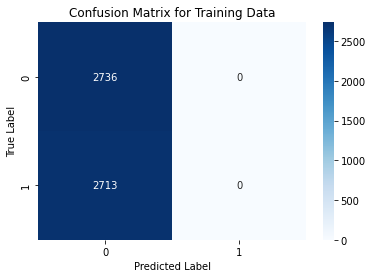

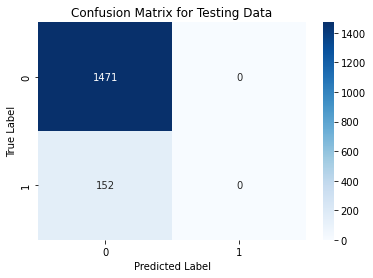

In [40]:

# Define the class weights for balancing the dataset
class_weights = {0: 1, 1: 1/fraud_percentage}

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train_res.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auc])

# Fit the model on the resampled training data
history = model.fit(x_train_res, y_train_res, batch_size=64, epochs=10, class_weight=class_weights, verbose=1)

# Predict on the training data
y_train_pred = model.predict(x_train_res)
y_train_pred_final = (y_train_pred > 0.5).astype(int)

# Predict on the testing data
y_test_pred = model.predict(x_te)
y_test_pred_final = (y_test_pred > 0.5).astype(int)

# Evaluate the f1 score and ROC AUC score of the model
f1 = f1_score(y_te, y_test_pred_final)
roc_auc = roc_auc_score(y_te, y_test_pred)
print("F1 score of neural network model:", f1)
print("ROC AUC score of neural network model:", roc_auc)

# Compute the confusion matrix for the training data
cm_train = confusion_matrix(y_train_res, y_train_pred_final)
print("Confusion Matrix for training data:\n", cm_train)

# Compute the confusion matrix for the testing data
cm_test = confusion_matrix(y_te, y_test_pred_final)
print("Confusion Matrix for testing data:\n", cm_test)

# Plot the confusion matrix for the training data
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the confusion matrix for the testing data
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Testing Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# using LSTM model to train the model

Epoch 1/10
86/86 [==============================] - 50s 396ms/step - loss: 0.1020 - accuracy: 0.5454 - auc_2: 0.5733
Epoch 2/10
86/86 [==============================] - 36s 413ms/step - loss: 0.0491 - accuracy: 0.5021 - auc_2: 0.5916
Epoch 3/10
86/86 [==============================] - 34s 398ms/step - loss: 0.0487 - accuracy: 0.5021 - auc_2: 0.6011
Epoch 4/10
86/86 [==============================] - 34s 397ms/step - loss: 0.0477 - accuracy: 0.5021 - auc_2: 0.6319
Epoch 5/10
86/86 [==============================] - 35s 402ms/step - loss: 0.0475 - accuracy: 0.5021 - auc_2: 0.6347
Epoch 6/10
86/86 [==============================] - 33s 386ms/step - loss: 0.0474 - accuracy: 0.5021 - auc_2: 0.6401
Epoch 7/10
86/86 [==============================] - 34s 393ms/step - loss: 0.0469 - accuracy: 0.5021 - auc_2: 0.6537
Epoch 8/10
86/86 [==============================] - 35s 403ms/step - loss: 0.0471 - accuracy: 0.5021 - auc_2: 0.6439
Epoch 9/10
86/86 [==============================] - 35s 405ms/st

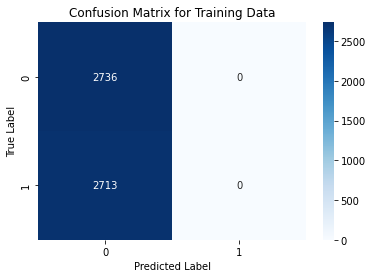

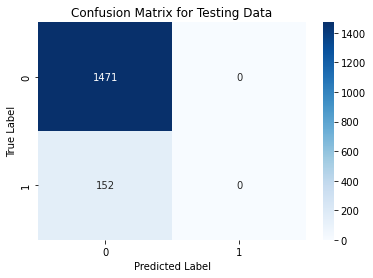

In [41]:

# Reshape the input data for LSTM
x_train_res = np.reshape(x_train_res, (x_train_res.shape[0], x_train_res.shape[1], 1))
x_te = np.reshape(x_te, (x_te.shape[0], x_te.shape[1], 1))

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=64, input_shape=(x_train_res.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=16))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC()])

# Train the model
history = model.fit(x_train_res, y_train_res, epochs=10, batch_size=64, class_weight={0: 1, 1: 1/fraud_percentage})

# Evaluate the model on test data
y_pred = model.predict(x_te)
y_pred = (y_pred > 0.5).astype(int)
# Evaluate the f1 score and ROC AUC score of the model
f1 = f1_score(y_te, y_test_pred_final)
roc_auc = roc_auc_score(y_te, y_test_pred)
print("F1 score of neural network model:", f1)
print("ROC AUC score of neural network model:", roc_auc)

# Compute the confusion matrix for the training data
cm_train = confusion_matrix(y_train_res, y_train_pred_final)
print("Confusion Matrix for training data:\n", cm_train)

# Compute the confusion matrix for the testing data
cm_test = confusion_matrix(y_te, y_test_pred_final)
print("Confusion Matrix for testing data:\n", cm_test)

# Plot the confusion matrix for the training data
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the confusion matrix for the testing data
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Testing Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# training the model on cnn architecutre

Epoch 1/50
86/86 [==============================] - 4s 39ms/step - loss: 0.2061 - accuracy: 0.5008 - auc_3: 0.5212
Epoch 2/50
86/86 [==============================] - 5s 53ms/step - loss: 0.1838 - accuracy: 0.5025 - auc_3: 0.5087
Epoch 3/50
86/86 [==============================] - 3s 39ms/step - loss: 0.1796 - accuracy: 0.5023 - auc_3: 0.5069
Epoch 4/50
86/86 [==============================] - 3s 38ms/step - loss: 0.1768 - accuracy: 0.5023 - auc_3: 0.5015
Epoch 5/50
86/86 [==============================] - 4s 50ms/step - loss: 0.1740 - accuracy: 0.5021 - auc_3: 0.5263
Epoch 6/50
86/86 [==============================] - 3s 40ms/step - loss: 0.1734 - accuracy: 0.5017 - auc_3: 0.5026
Epoch 7/50
86/86 [==============================] - 3s 38ms/step - loss: 0.1728 - accuracy: 0.5021 - auc_3: 0.5120
Epoch 8/50
86/86 [==============================] - 3s 38ms/step - loss: 0.1698 - accuracy: 0.5021 - auc_3: 0.5185
Epoch 9/50
86/86 [==============================] - 5s 53ms/step - loss: 0.1683 

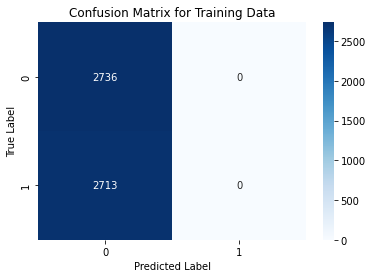

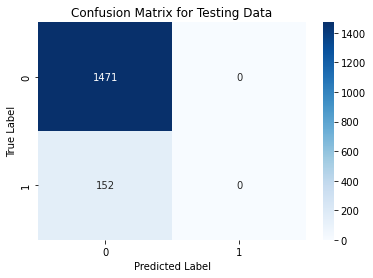

In [42]:


# Reshape the input data for CNN
x_train_res = np.reshape(x_train_res, (x_train_res.shape[0], x_train_res.shape[1], 1))
x_te = np.reshape(x_te, (x_te.shape[0], x_te.shape[1], 1))

# Define the CNN model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='sigmoid', input_shape=(x_train_res.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy', tf.keras.metrics.AUC()])

# Train the model
history = model.fit(x_train_res, y_train_res, epochs=50, batch_size=64, class_weight={0: 1, 1: 1/fraud_percentage})

# Evaluate the model on test data
y_pred = model.predict(x_te)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the f1 score and ROC AUC score of the model
f1 = f1_score(y_te, y_pred)
roc_auc = roc_auc_score(y_te, y_pred)
print("F1 score of CNN model:", f1)
print("ROC AUC score of CNN model:", roc_auc)

# Compute the confusion matrix for the training data
y_train_pred = model.predict(x_train_res)
y_train_pred_final = (y_train_pred > 0.5).astype(int)
cm_train = confusion_matrix(y_train_res, y_train_pred_final)
print("Confusion Matrix for training data:\n", cm_train)

# Compute the confusion matrix for the testing data
cm_test = confusion_matrix(y_te, y_pred)
print("Confusion Matrix for testing data:\n", cm_test)

# Plot the confusion matrix for the training data
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the confusion matrix for the testing data
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Testing Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [48]:
# Make predictions on the test set using each model and combine the predictions
predictions = np.zeros_like(y_te, dtype=np.float64) # <-- Set dtype to float64
for model in models:
    y_pred = model.predict(x_te)
    y_pred = y_pred.reshape(predictions.shape)
    predictions += y_pred
predictions /= num_models
predictions = (predictions > 0.5).astype(int)

# Evaluate the f1 score and ROC AUC score of the ensemble model
f1 = f1_score(y_te, predictions)
roc_auc = roc_auc_score(y_te, predictions)
print("F1 score of ensemble model:", f1)
print("ROC AUC score of ensemble model:", roc_auc)

# Compute the confusion matrix for the testing data
cm_test = confusion_matrix(y_te, predictions)
print("Confusion Matrix for testing data:\n", cm_test)

51/51 [==============================] - 0s 6ms/step
F1 score of ensemble model: 0.0
ROC AUC score of ensemble model: 0.5
Confusion Matrix for testing data:
 [[1471    0]
 [ 152    0]]


#**will going to try out some more ensemble models**

Epoch 1/50
86/86 [==============================] - 2s 3ms/step - loss: 0.0802 - accuracy: 0.5137 - auc_15: 0.6998
Epoch 2/50
86/86 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.5082 - auc_15: 0.7999
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.5050 - auc_15: 0.8236
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.5036 - auc_15: 0.8377
Epoch 5/50
86/86 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.5034 - auc_15: 0.8427
Epoch 6/50
86/86 [==============================] - 0s 4ms/step - loss: 0.0420 - accuracy: 0.5027 - auc_15: 0.8477
Epoch 7/50
86/86 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.5028 - auc_15: 0.8543
Epoch 8/50
86/86 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 0.5025 - auc_15: 0.8596
Epoch 9/50
86/86 [==============================] - 0s 4ms/step - loss: 0.0391 -

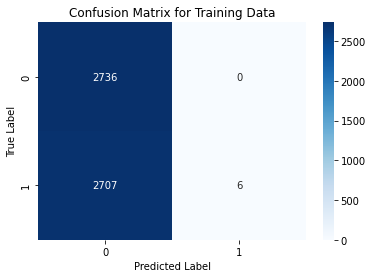

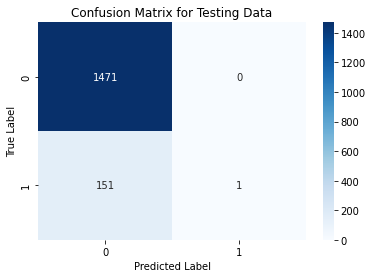

In [67]:


# Reshape the input data for MLP
x_train_res = x_train_res.reshape((x_train_res.shape[0], -1))
x_te = x_te.reshape((x_te.shape[0], -1))

# Define the MLP model architecture
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=x_train_res.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC()])

# Train the model
history = model.fit(x_train_res, y_train_res, epochs=50, batch_size=64, class_weight={0: 1, 1: 1/fraud_percentage})

# Predict on test data
y_pred = model.predict(x_te)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model on test data
f1 = f1_score(y_te, y_pred)
roc_auc = roc_auc_score(y_te, y_pred)
print("F1 score of MLP model:", f1)
print("ROC AUC score of MLP model:", roc_auc)

# Compute the confusion matrix for the training data
y_train_pred = model.predict(x_train_res)
y_train_pred_final = (y_train_pred > 0.5).astype(int)
cm_train = confusion_matrix(y_train_res, y_train_pred_final)
print("Confusion Matrix for training data:\n", cm_train)

# Compute the confusion matrix for the testing data
cm_test = confusion_matrix(y_te, y_pred)
print("Confusion Matrix for testing data:\n", cm_test)

# Plot the confusion matrix for the training data
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the confusion matrix for the testing data
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Testing Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
